### Notebook to visualize 1month data from netcdf CUMULO data
Target: 2008 January

In [1]:
import os
import gc
import glob
import numpy as np
from scipy.stats import mode
from netCDF4 import Dataset

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

#### NetCDF Loader

In [2]:
def importNetcdf(path=None, var_name=None):
    nc_fid=Dataset(path, 'r')
    field = nc_fid.variables[var_name][:]
    return field

In [35]:
#datadir = "/home/tkurihana/Research/data3/200801/day"
datadir = "/home/tkurihana/Research/data3/200804"

In [39]:
datalist = glob.glob(os.path.join(datadir, "*.nc"))
len(datalist)

158

#### Frequent estimated cloud labels

In [16]:
def comp_freqlabel(data, undef=-1):
    data = data.astype(np.float64)
    nan_idx = np.where(data == undef)
    data[nan_idx] = np.nan
    # mode function
    prep = mode(data,axis=3)
    mode_array = prep[0]
    # check data points where all layers are np.NaN
    nan_idx2 = np.where(np.isnan(mode_array))
    mode_array[nan_idx2] = undef
    mode_array = mode_array.astype(int)
    return mode_array

#### Visualizer

In [7]:
def plot_map(data, longs, lats, cmap='jet',s=1, alpha=0.05, fontsize=20):
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])
    map = Basemap(projection='cyl',
                    llcrnrlat=-90, urcrnrlat=90,llcrnrlon=-180, urcrnrlon=180,
                  resolution='l'
    )
    map.drawcoastlines()
    
    vmax=np.nanmax(data)
    vmin=np.nanmin(data)
    for fil_long, fil_lat, idata in zip(longs, lats, data):
        x,y = map(fil_long, fil_lat)
        # Plot swaths
        map.scatter(x,y,c=idata, cmap=cmap,vmax=vmax, vmin=vmin,
                    s=s, alpha=alpha
                   )
        map.drawcoastlines()
        map.drawparallels(np.arange(-60.,120.,60.), \
                            labels=[1,0,0,0], fontsize=fontsize
        )
        map.drawmeridians(np.arange(-180.,180.,180.), \
                            labels=[0,0,0,1], fontsize=fontsize
        )
    plt.show()

In [19]:
def plot_map2(data, longs, lats, cmap='jet',s=1, alpha=0.05, fontsize=20, undef=-1):
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])
    map = Basemap(projection='cyl',
                    llcrnrlat=-90, urcrnrlat=90,llcrnrlon=-180, urcrnrlon=180,
                  resolution='l'
    )
    map.drawcoastlines()
    
    vmax=np.nanmax(data)
    vmin=np.nanmin(data)
    for fil_long, fil_lat, idata in zip(longs, lats, data):
        x,y = map(fil_long, fil_lat)
        
        #get non-undef place
        okindex = np.where(idata> undef)
        
        # Plot swaths
        map.scatter(x[okindex],y[okindex],c=idata[okindex], cmap=cmap,vmax=vmax, vmin=vmin,
                    s=s, alpha=alpha
                   )
        map.drawcoastlines()
        map.drawparallels(np.arange(-60.,120.,60.), \
                            labels=[1,0,0,0], fontsize=fontsize
        )
        map.drawmeridians(np.arange(-180.,180.,180.), \
                            labels=[0,0,0,1], fontsize=fontsize
        )
    plt.show()

##### Visualize:  1 month 2008

In [9]:
for idx, ifile in enumerate(datalist):
    if idx ==0:
        longs = importNetcdf(ifile, 'longitude')
        lats = importNetcdf(ifile, 'latitude')
        data = importNetcdf(ifile, 'ev_1km_emissive_34')
    else:
        tmp_longs = importNetcdf(ifile, 'longitude')
        tmp_lats = importNetcdf(ifile, 'latitude')
        tmp_data = importNetcdf(ifile, 'ev_1km_emissive_34')
        
        longs = np.concatenate([longs, tmp_longs])
        lats = np.concatenate([lats, tmp_lats])
        data = np.concatenate([data, tmp_data])

In [10]:
gc.collect()

1666

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


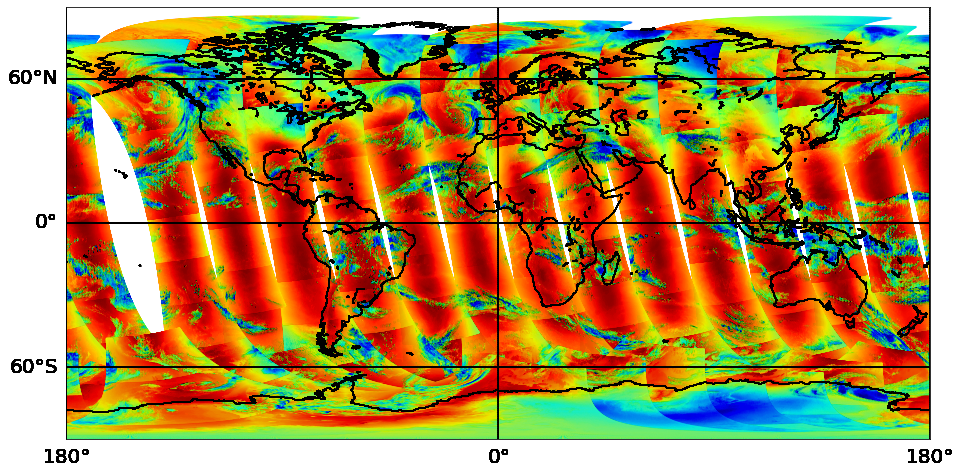

In [11]:
plot_map(data, longs, lats)

In [13]:
#plt.savefig('./fig_ev_1km_emissive_34-2008Jan1st')

<Figure size 432x288 with 0 Axes>

In [15]:
del longs, lats, data
gc.collect()

235937

#### TODO: Compute again as same max-min values

------------
#### Visualize: frequent cloud label 1month 2008

In [11]:
for idx, ifile in enumerate(datalist):
    if idx ==0:
        longs = importNetcdf(ifile, 'longitude')
        lats = importNetcdf(ifile, 'latitude')
        data = importNetcdf(ifile, 'cloud_layer_type')[:,:,:,0]
        #data = comp_freqlabel(data)
    else:
        tmp_longs = importNetcdf(ifile, 'longitude')
        tmp_lats = importNetcdf(ifile, 'latitude')
        tmp_data = importNetcdf(ifile, 'cloud_layer_type')[:,:,:,0]
        #tmp_data = comp_freqlabel(tmp_data)
        
        longs = np.concatenate([longs, tmp_longs])
        lats = np.concatenate([lats, tmp_lats])
        data = np.concatenate([data, tmp_data])

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


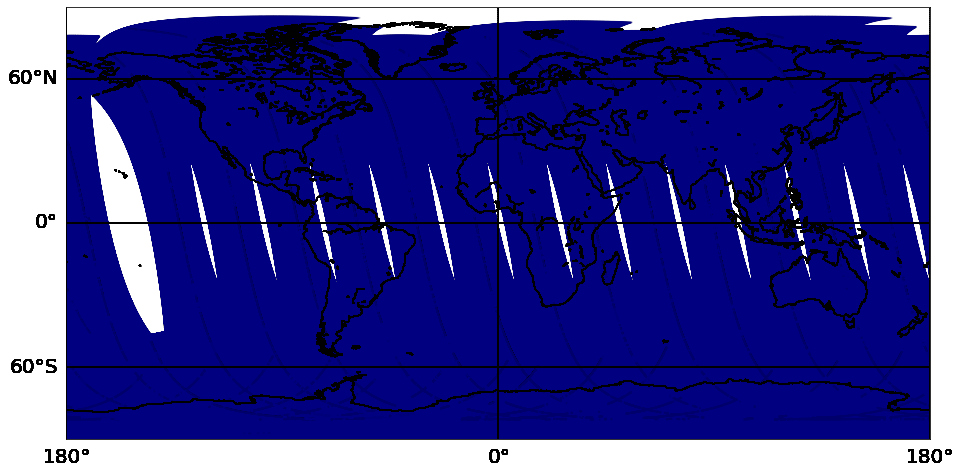

In [12]:
plot_map(data, longs, lats)

In [13]:
np.max(data), np.min(data)

(7, -1)

(157, 1354, 2030)


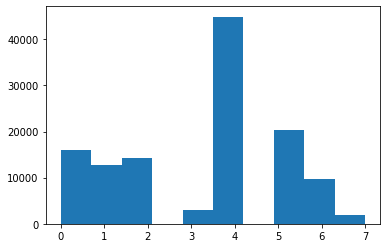

In [15]:
print(data.shape)
plt.figure()
plt.hist(data[np.where(data > -1)].ravel())
plt.show()

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


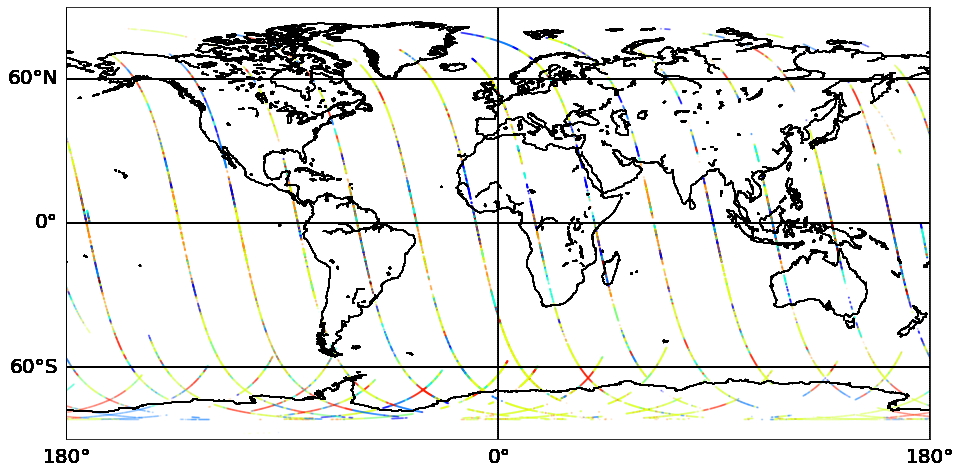

In [20]:
plot_map2(data, longs, lats, undef=-1)

(1, 1354, 2030, 10)


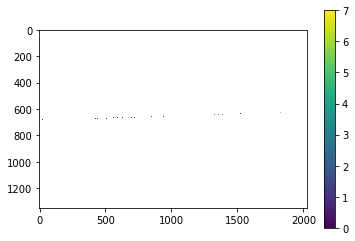

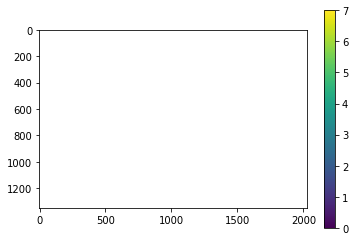

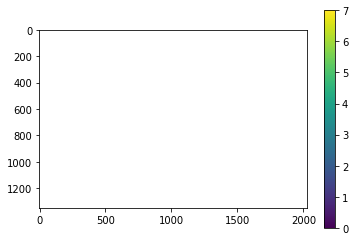

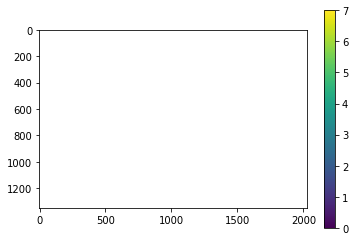

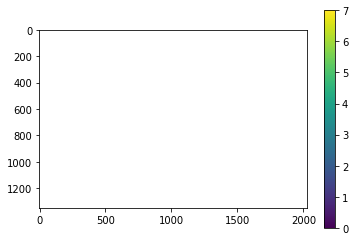

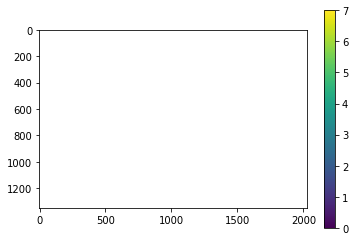

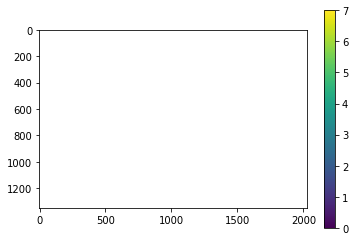

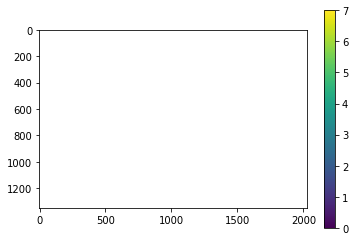

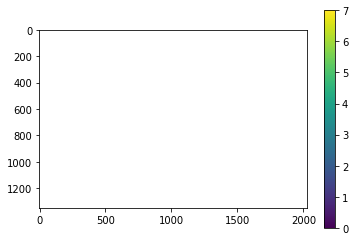

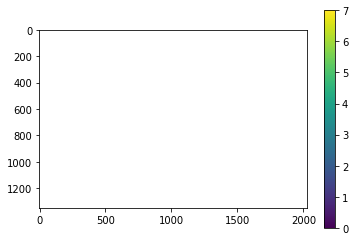

(1, 1354, 2030, 10)


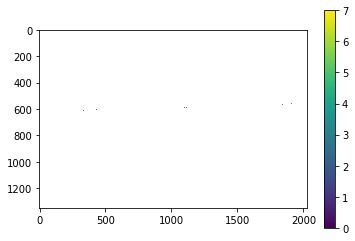

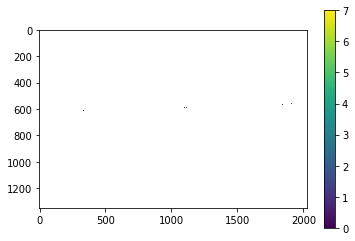

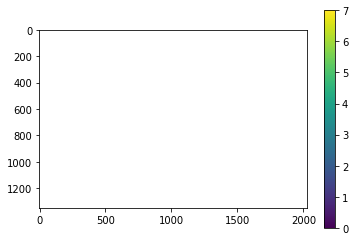

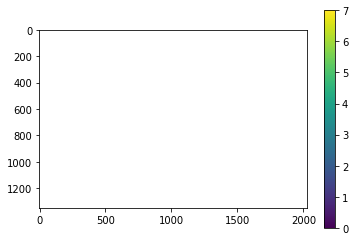

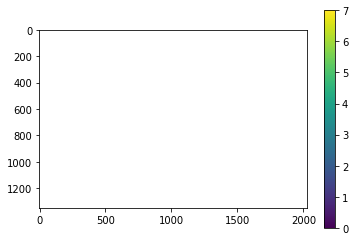

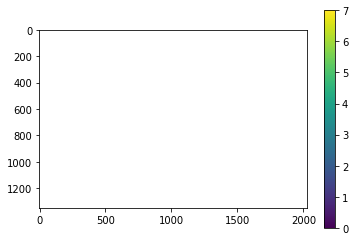

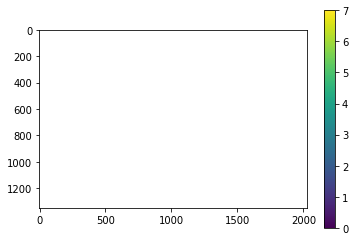

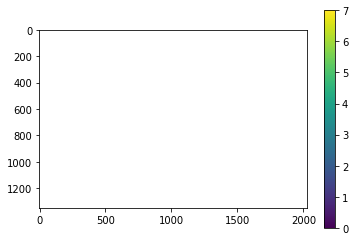

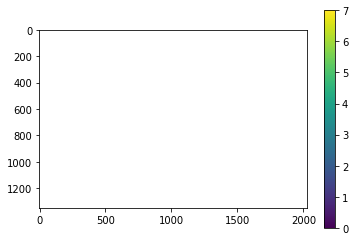

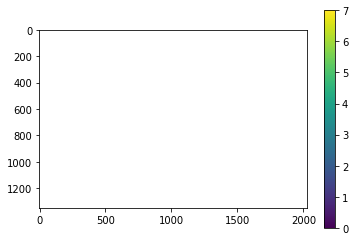

(1, 1354, 2030, 10)


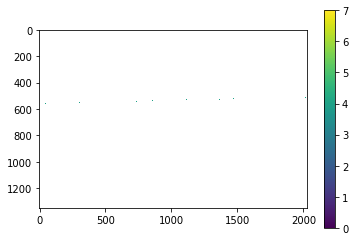

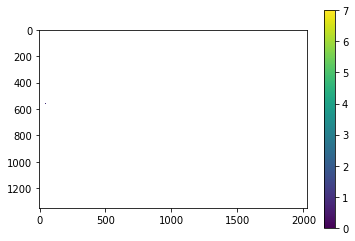

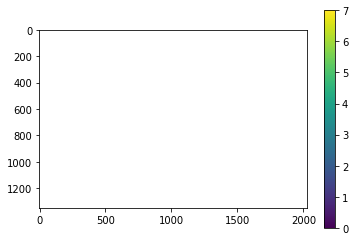

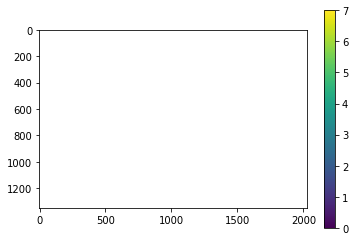

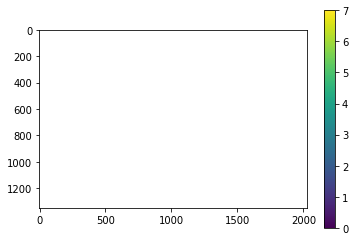

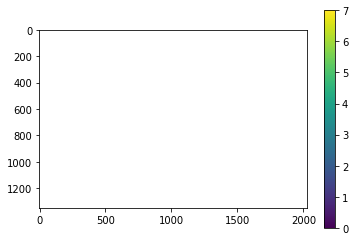

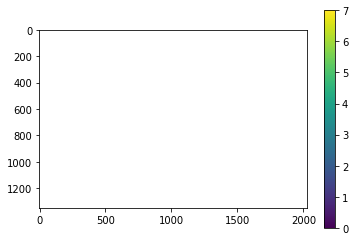

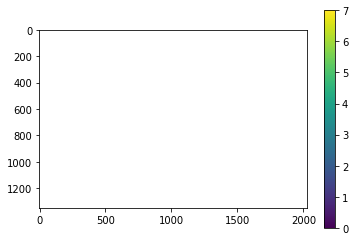

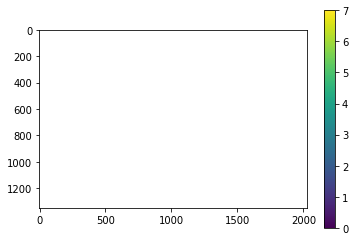

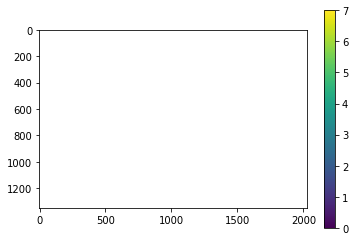

(1, 1354, 2030, 10)


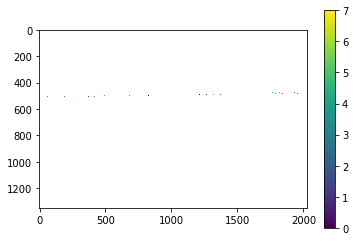

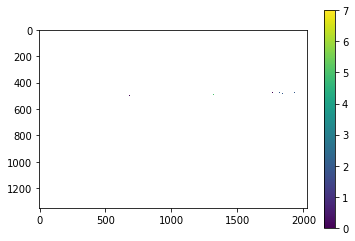

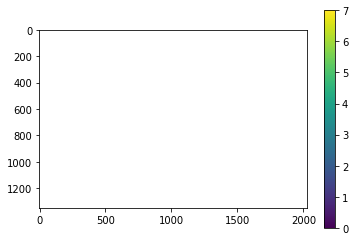

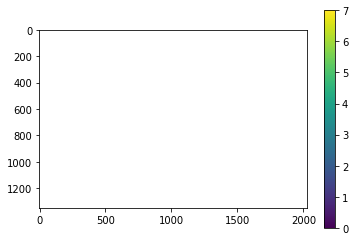

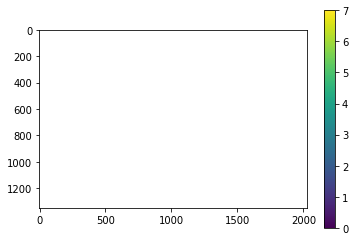

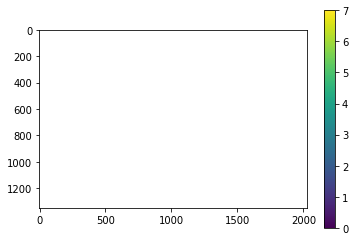

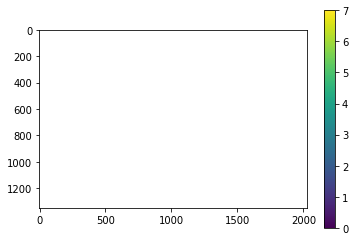

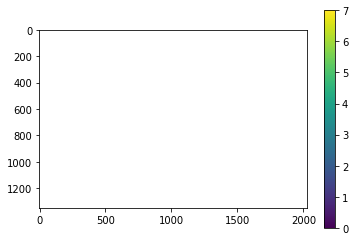

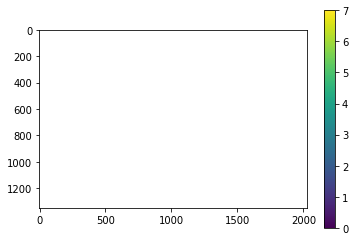

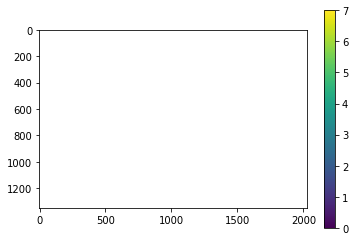

(1, 1354, 2030, 10)


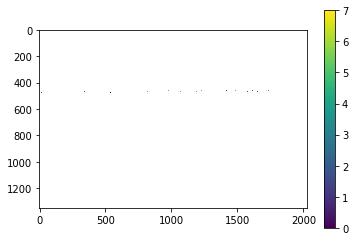

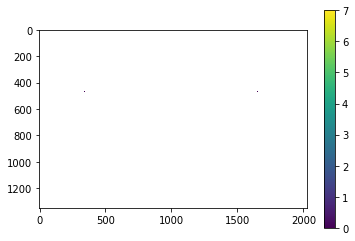

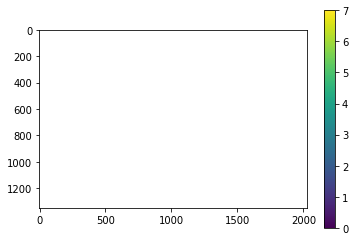

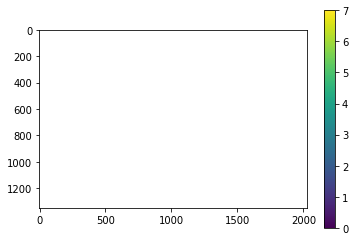

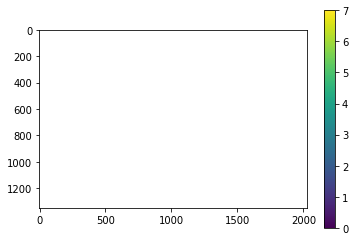

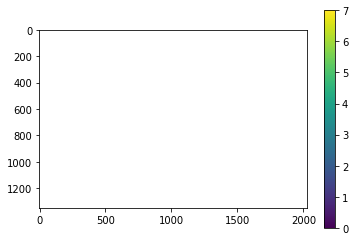

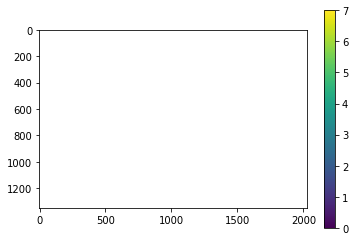

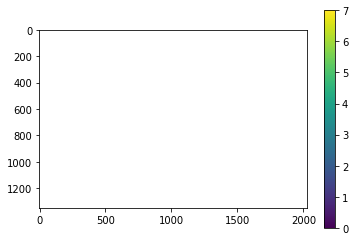

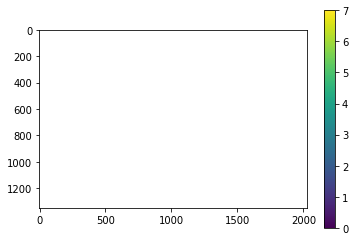

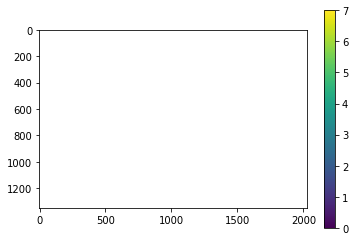

(1, 1354, 2030, 10)


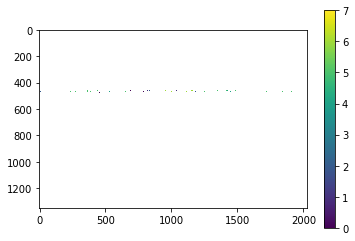

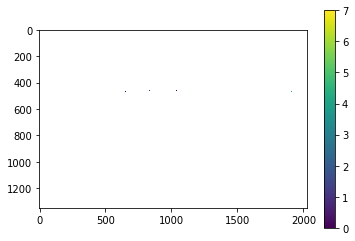

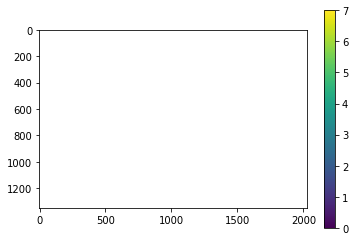

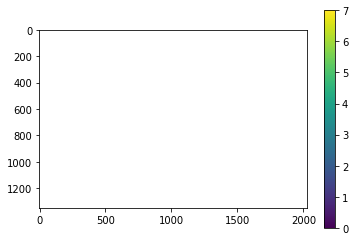

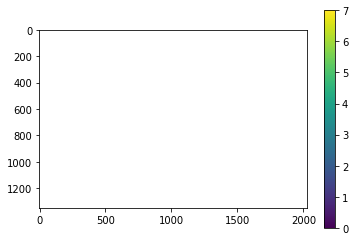

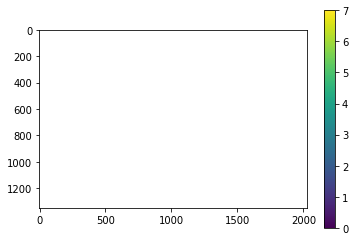

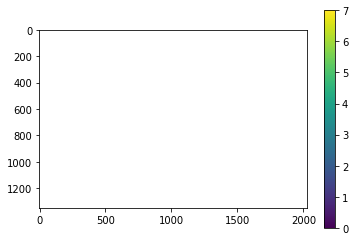

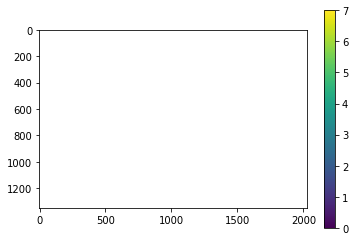

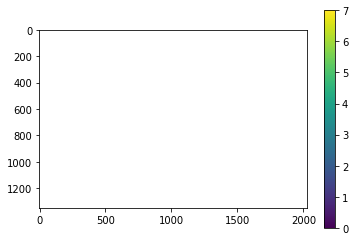

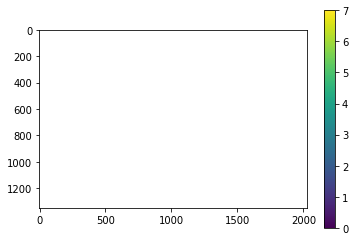

(1, 1354, 2030, 10)


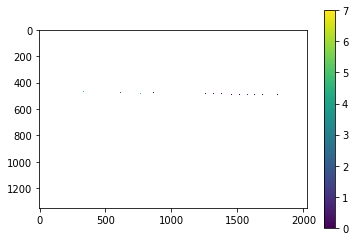

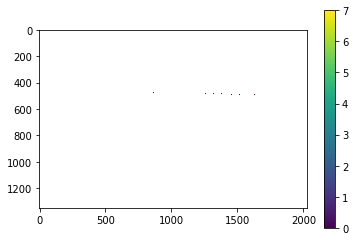

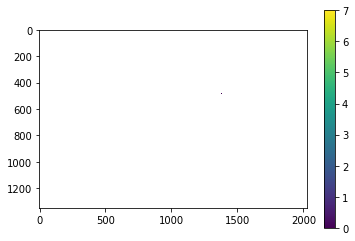

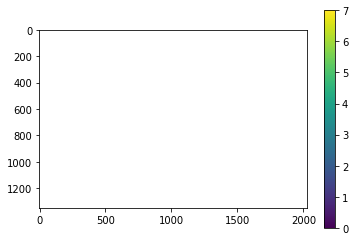

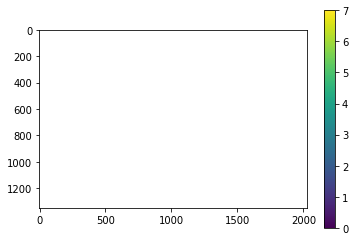

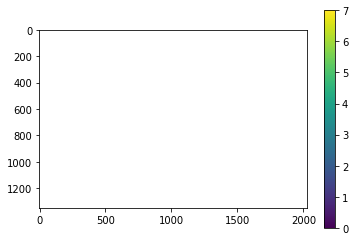

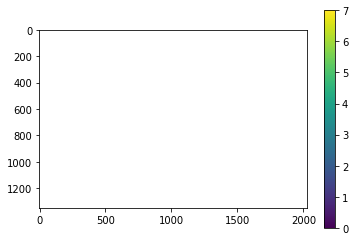

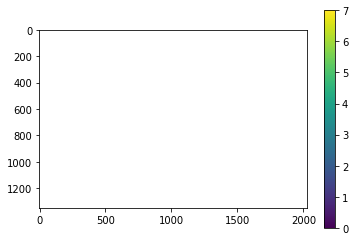

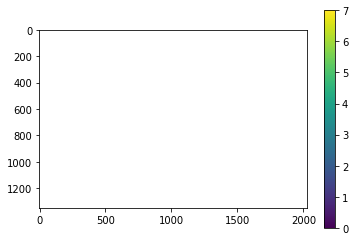

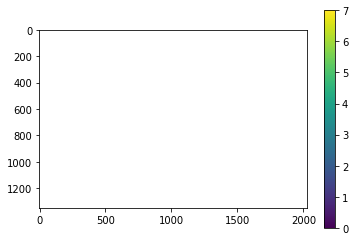

(1, 1354, 2030, 10)


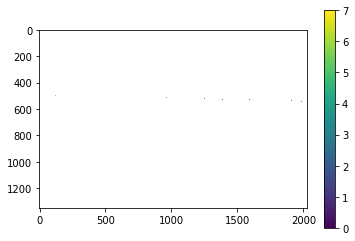

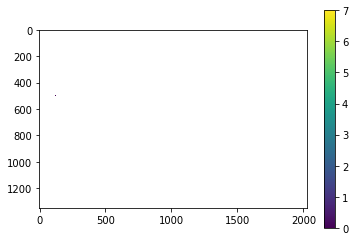

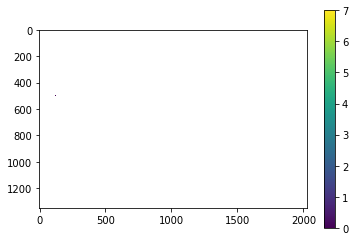

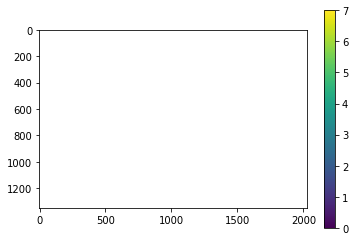

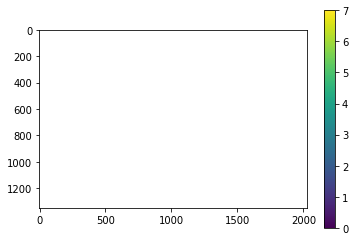

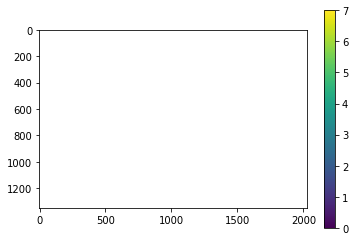

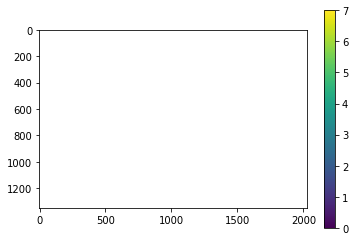

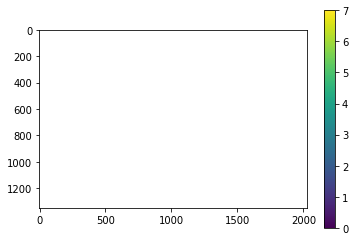

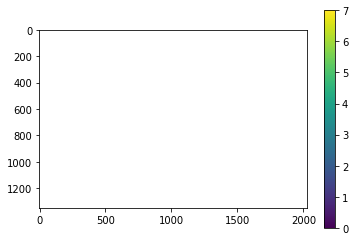

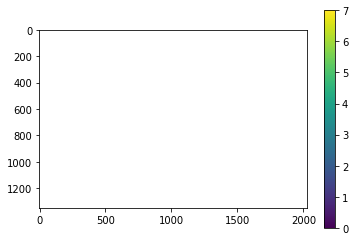

(1, 1354, 2030, 10)


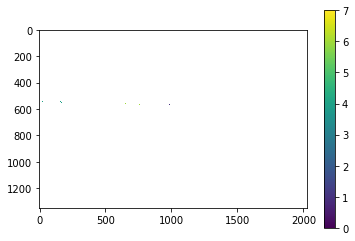

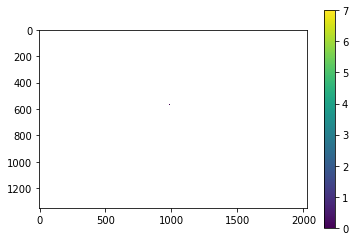

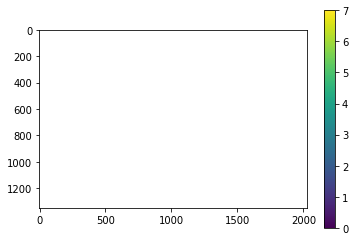

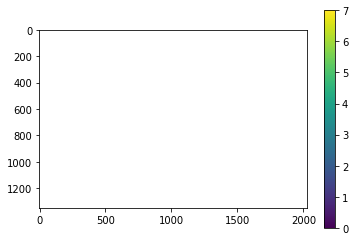

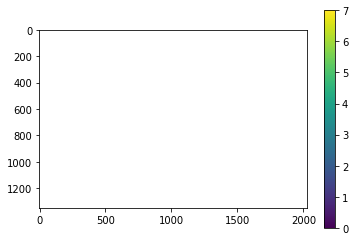

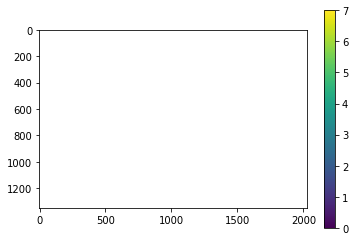

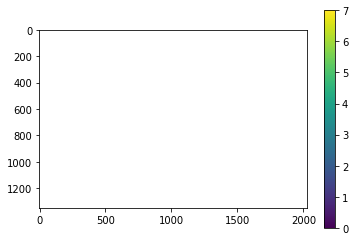

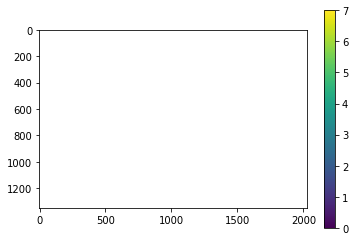

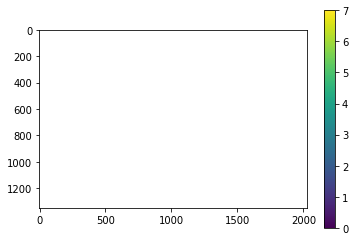

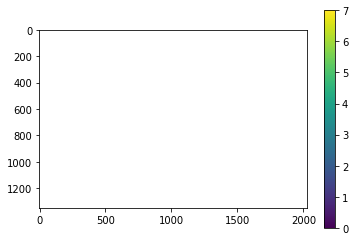

(1, 1354, 2030, 10)


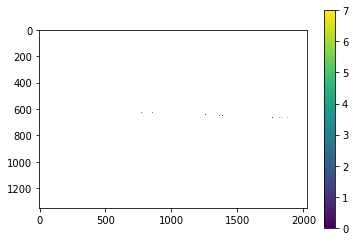

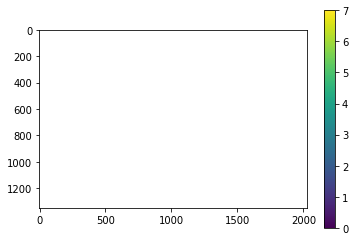

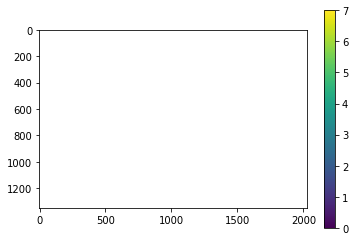

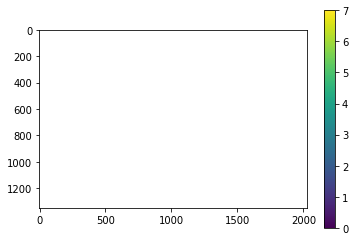

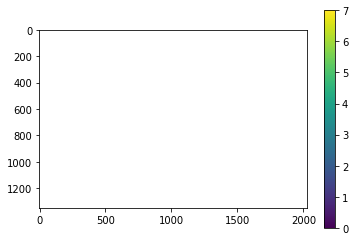

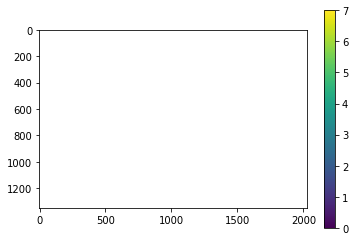

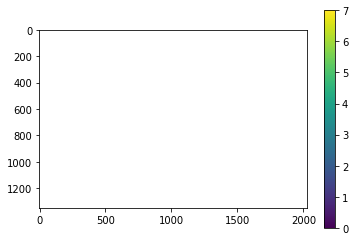

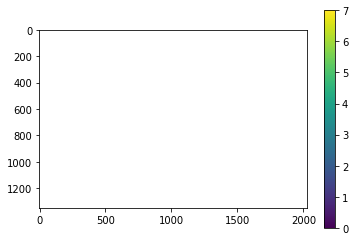

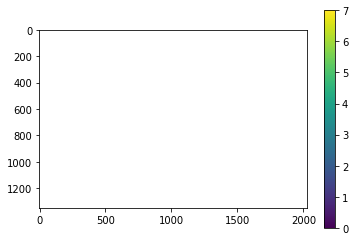

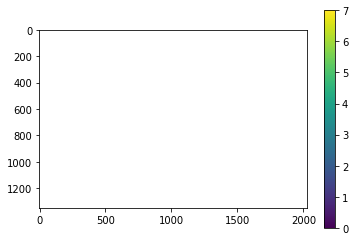

(1, 1354, 2030, 10)


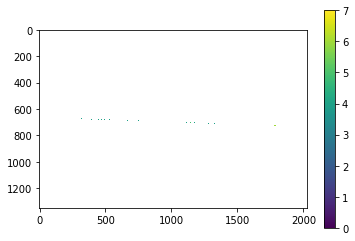

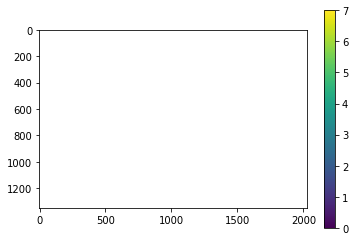

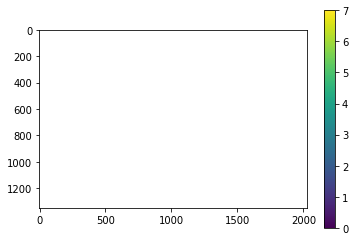

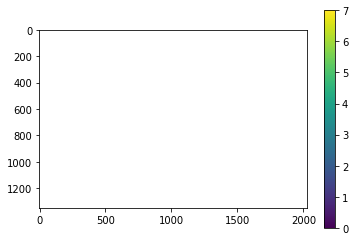

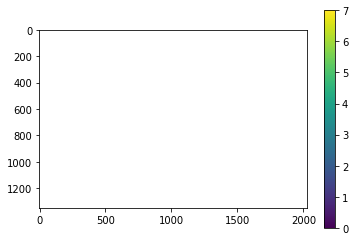

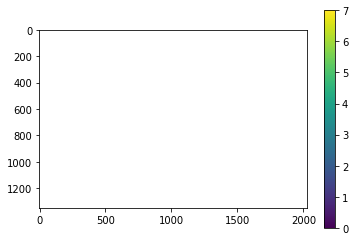

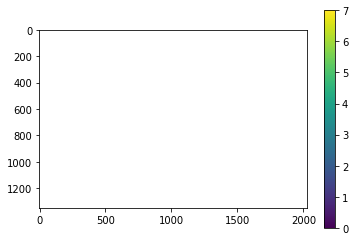

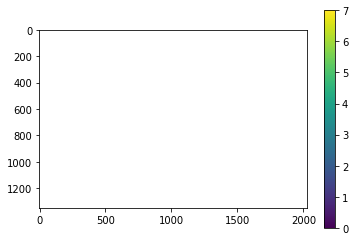

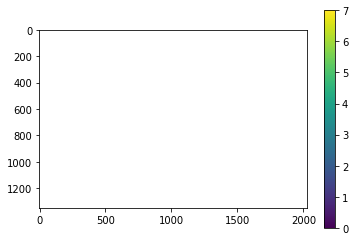

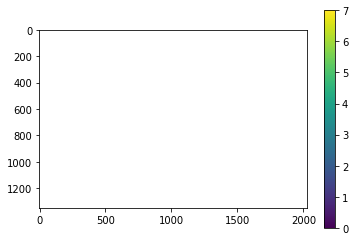

(1, 1354, 2030, 10)


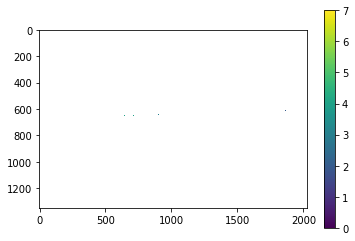

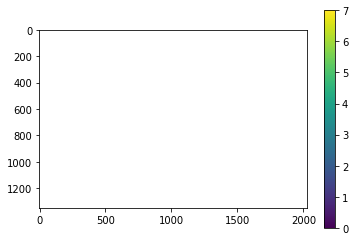

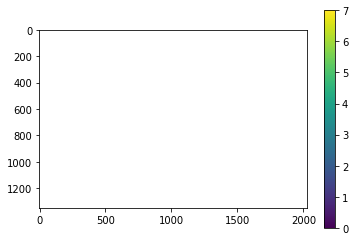

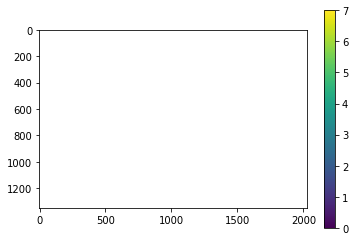

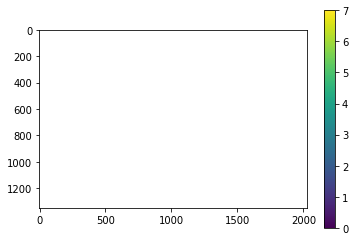

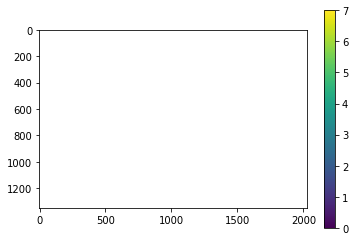

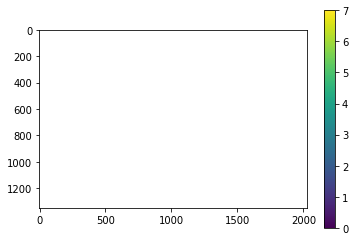

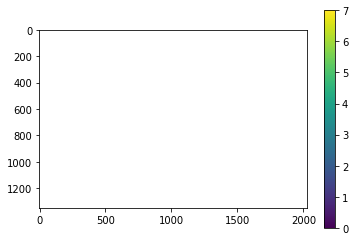

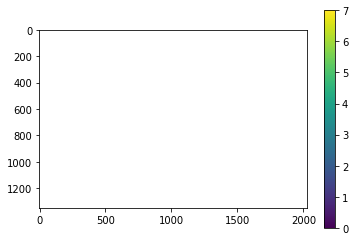

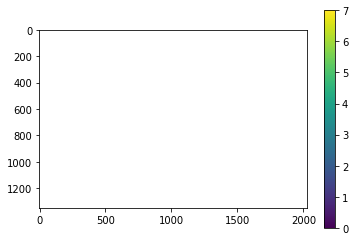

(1, 1354, 2030, 10)


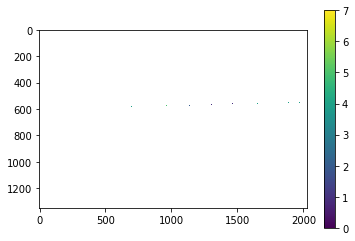

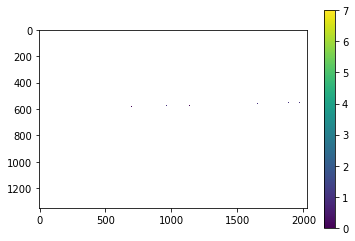

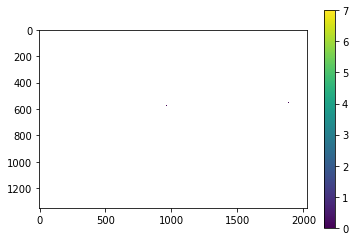

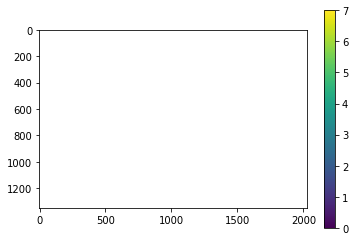

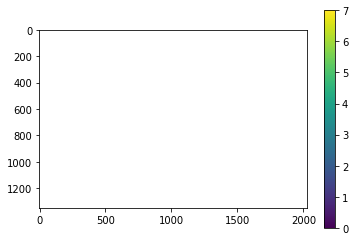

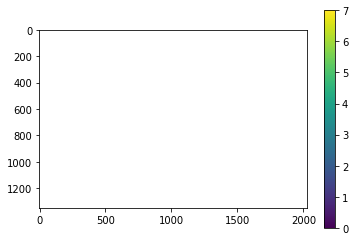

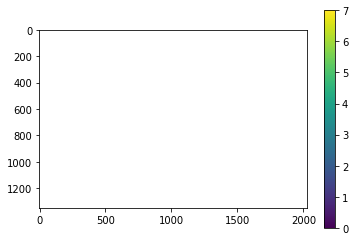

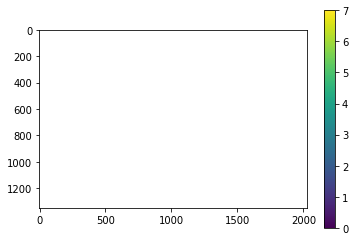

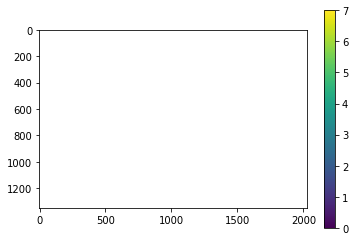

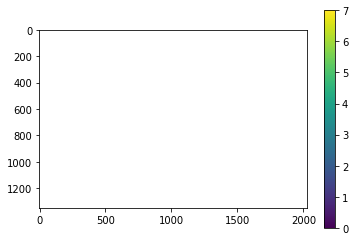

(1, 1354, 2030, 10)


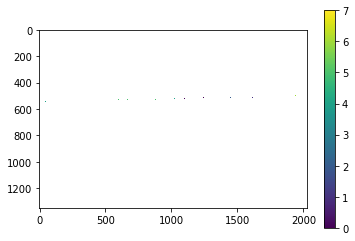

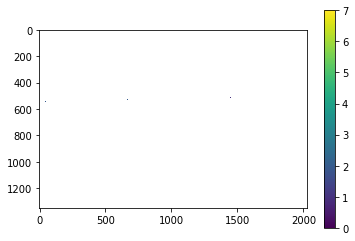

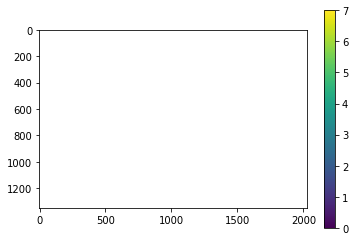

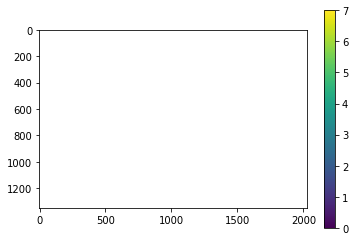

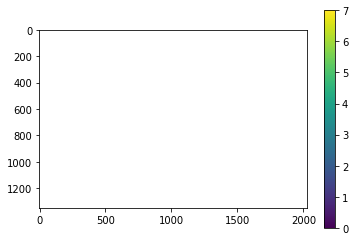

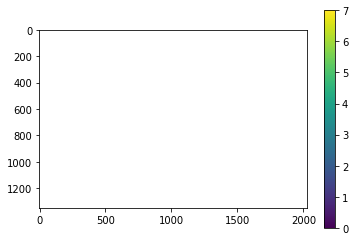

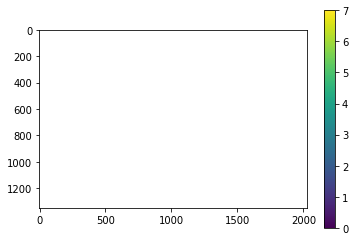

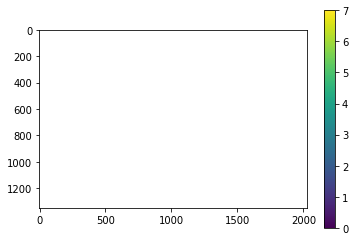

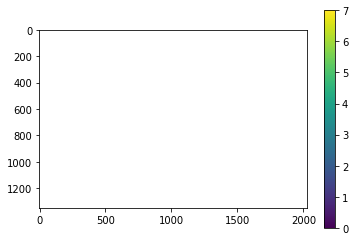

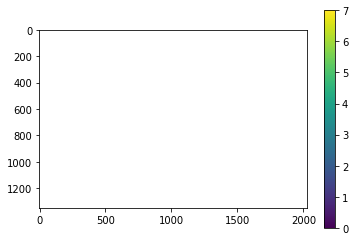

(1, 1354, 2030, 10)


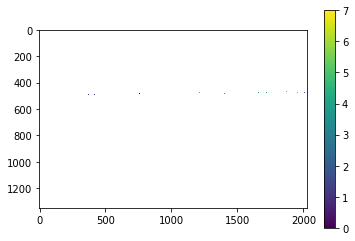

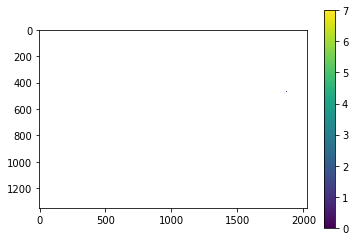

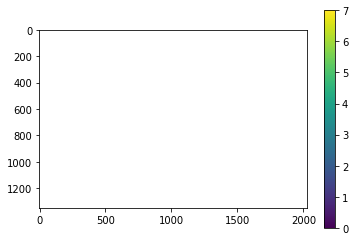

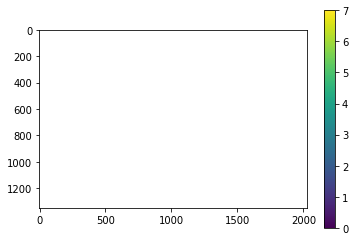

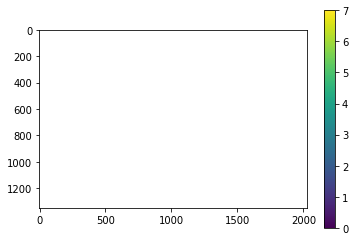

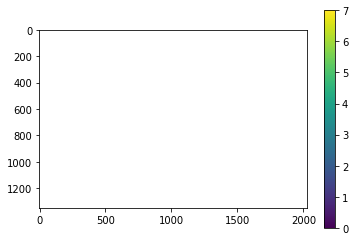

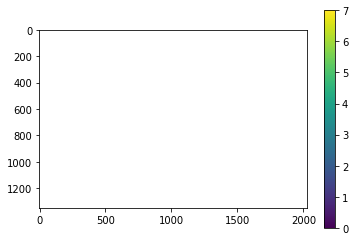

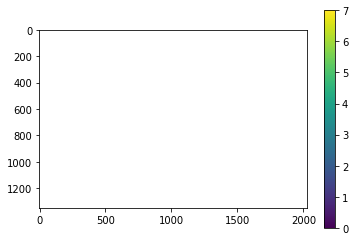

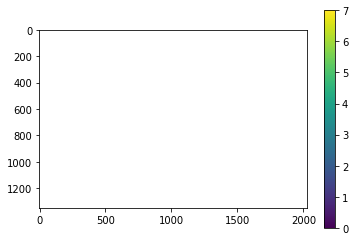

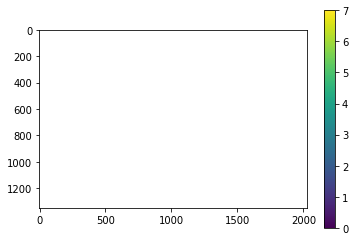

(1, 1354, 2030, 10)


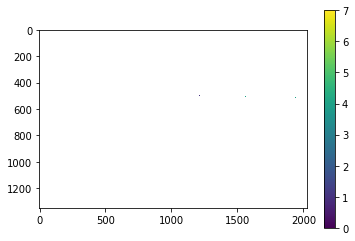

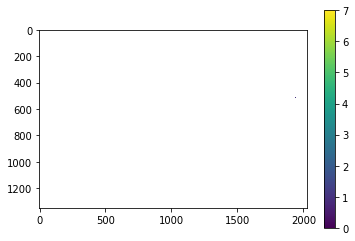

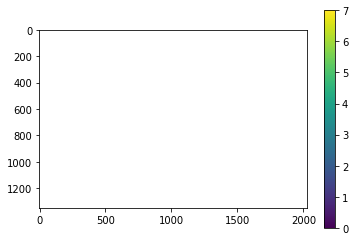

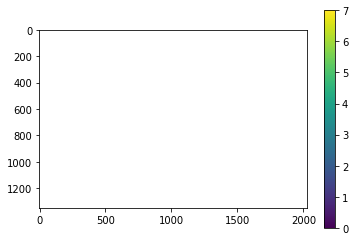

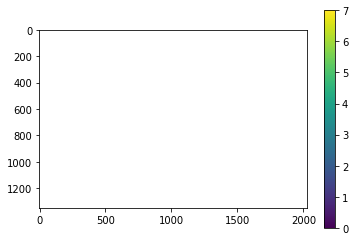

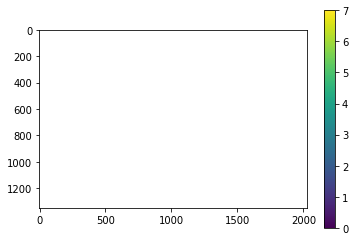

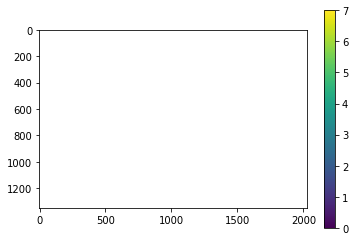

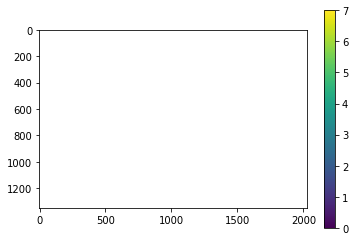

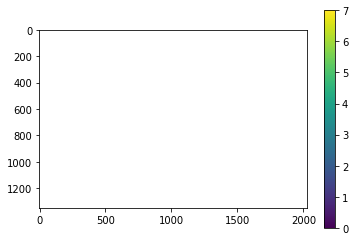

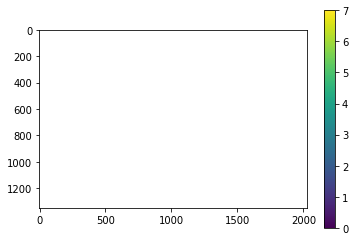

(1, 1354, 2030, 10)


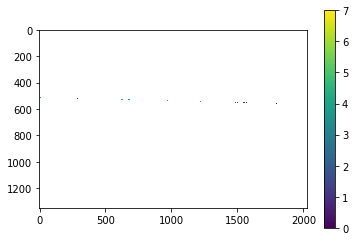

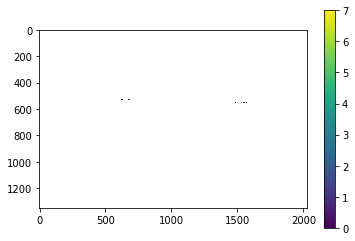

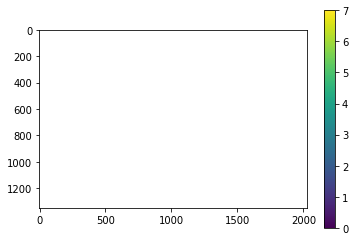

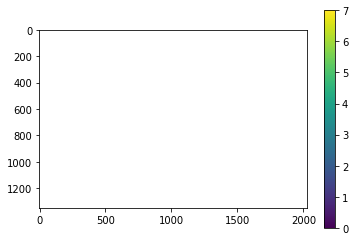

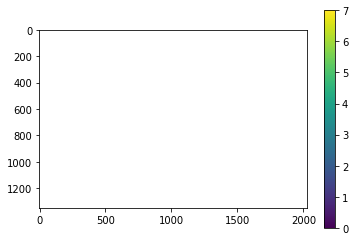

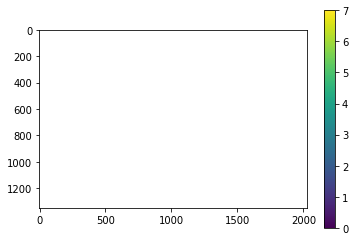

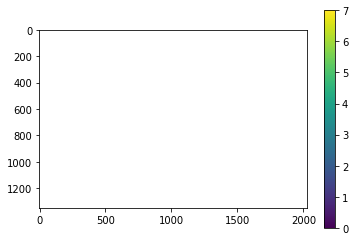

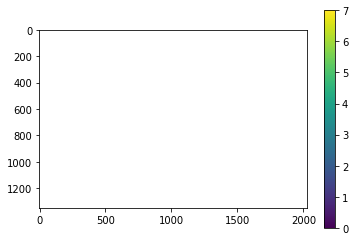

KeyboardInterrupt: 

In [38]:
for i in range(len(datalist)):
    A = importNetcdf(datalist[i], 'cloud_layer_type') 
    print(A.shape)
    for i in range(10):
        plt.figure()
        plt.imshow(A[0,:,:,i], vmin=0, vmax=7)
        plt.colorbar()
        plt.show()
        plt.close()

In [41]:
c = importNetcdf(datalist[0], 'cloud_layer_base')

In [42]:
c.shape

(1, 1354, 2030, 10)

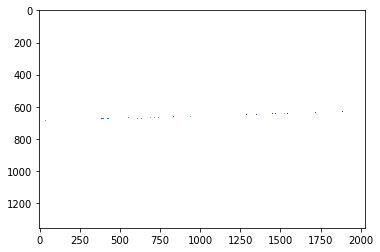

In [44]:
plt.imshow(c[0,:,:,0])

In [45]:
c = importNetcdf(datalist[0], 'cloud_type_quality')